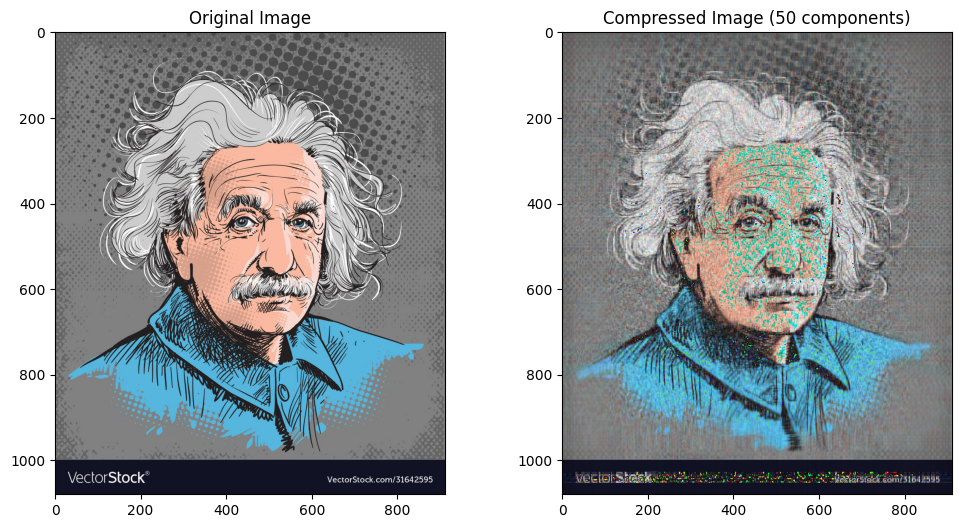

In [35]:
# problem 1

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def compress_image(img_path, num_components):
    # Load color image
    img = Image.open(img_path)
    img_array = np.array(img)

    # Separate color channels (R, G, B)
    red_channel = img_array[:,:,0]
    green_channel = img_array[:,:,1]
    blue_channel = img_array[:,:,2]

    # Perform SVD for each channel
    U_red, sigma_red, V_red = np.linalg.svd(red_channel, full_matrices=False)
    U_green, sigma_green, V_green = np.linalg.svd(green_channel, full_matrices=False)
    U_blue, sigma_blue, V_blue = np.linalg.svd(blue_channel, full_matrices=False)

    # Keep only the specified number of components
    U_red = U_red[:, :num_components]
    sigma_red = np.diag(sigma_red[:num_components])
    V_red = V_red[:num_components, :]

    U_green = U_green[:, :num_components]
    sigma_green = np.diag(sigma_green[:num_components])
    V_green = V_green[:num_components, :]

    U_blue = U_blue[:, :num_components]
    sigma_blue = np.diag(sigma_blue[:num_components])
    V_blue = V_blue[:num_components, :]

    # Reconstruct compressed channels
    compressed_red_channel = U_red @ sigma_red @ V_red
    compressed_green_channel = U_green @ sigma_green @ V_green
    compressed_blue_channel = U_blue @ sigma_blue @ V_blue

    # Stack the compressed channels to get the compressed color image
    compressed_image = np.stack(
        [compressed_red_channel, compressed_green_channel, compressed_blue_channel],
        axis=-1
    )

    # Display the original and compressed images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    # Compressed Image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image.astype(np.uint8))
    plt.title(f'Compressed Image ({num_components} components)')

    plt.show()

# Example usage
compress_image('/content/einstein-color-image.jpg', num_components=50)


In [36]:
# problem 2

# rayleight itertion method
def rayleigh_iteration(A, a, num_iterations=1000, tol=1e-10):
    identity = np.eye(A.shape[0])

    for _ in range(num_iterations):
        a_norm = np.linalg.norm(a)
        a = a / a_norm
        sigma = np.dot(np.dot(a.T, A), a)
        matrix_inverse = np.linalg.inv(A - sigma * identity)
        a = np.dot(matrix_inverse, a)

    a_norm = np.linalg.norm(a)
    a = a / a_norm
    sigma = np.dot(np.dot(a.T, A), a)

    return sigma, a

# power_iteration method
def power_iteration(A, num_iterations=1000, tol=1e-10):
    n = A.shape[0]
    a = np.random.rand(n)

    for _ in range(num_iterations):
        a_next = np.dot(A, a)
        a_next_norm = np.linalg.norm(a_next)
        a = a_next / a_next_norm

    return a


def svd(A, tol=1e-10, num_iterations=1000):
    AAt = np.dot(A, A.T)
    AtA = np.dot(A.T, A)

    eigvectors = power_iteration(AAt, num_iterations=num_iterations, tol=tol)

    eig_val, eig_vec = rayleigh_iteration(AAt, eigvectors,
                                                 num_iterations=num_iterations, tol=tol)

    S = np.sqrt(np.abs(eig_val))

    U = eig_vec
    V = np.dot(A.T, U) / S

    return U, S, V


np.random.seed(100)
A = np.random.random((3, 3))
U, S, Vt = svd(A)

print("U :", U)
print("S :", S)
print("Vt :", Vt)



U : [0.48966294 0.51164526 0.70600944]
S : 1.424297948617219
Vt : [0.82276756 0.50676292 0.2573808 ]


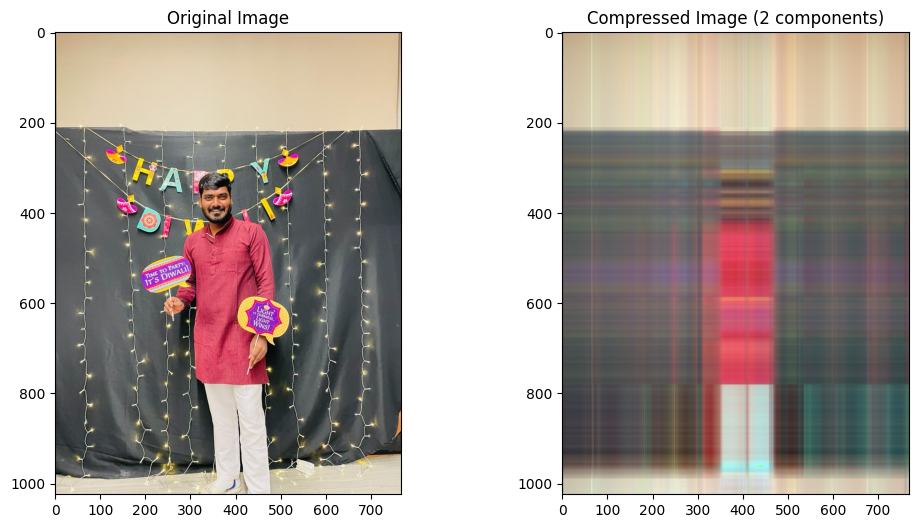

percentage_mem =  0.01367950439453125
relative_error =  0.24351263423901107


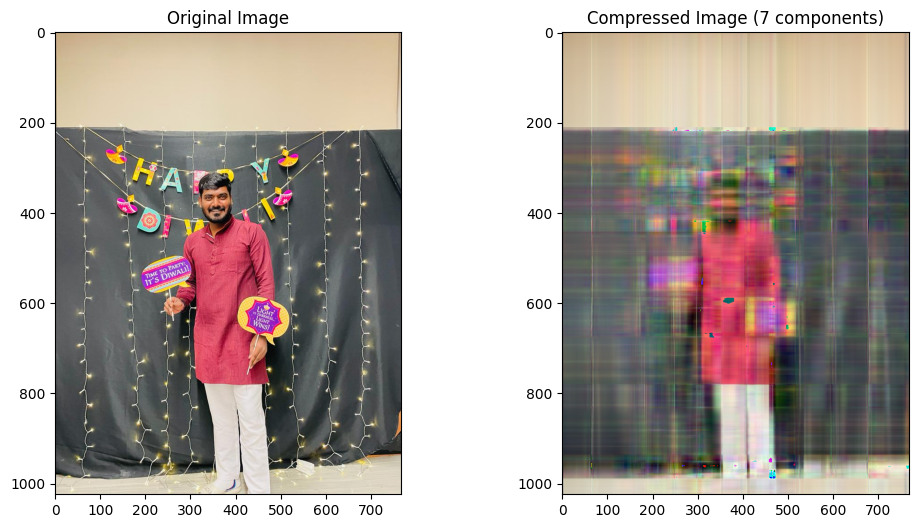

percentage_mem =  0.047878265380859375
relative_error =  0.18688946098315606


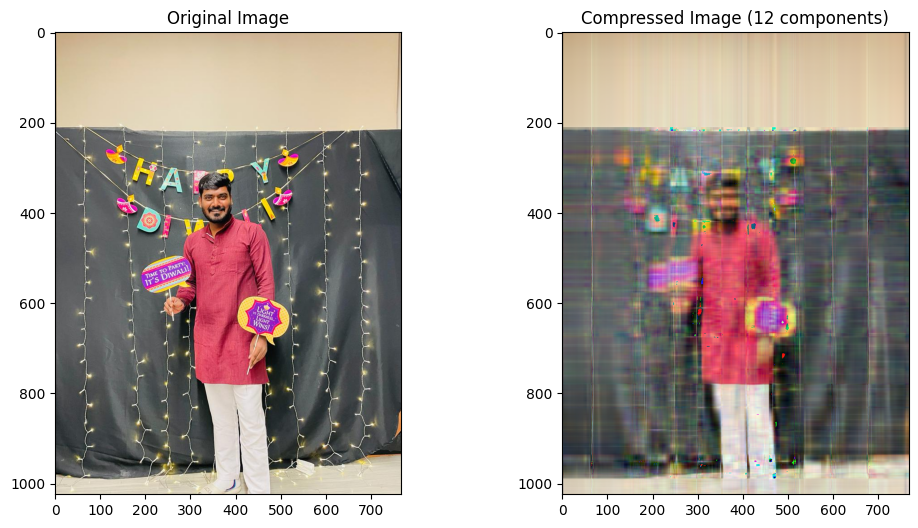

percentage_mem =  0.0820770263671875
relative_error =  0.16461640961437735


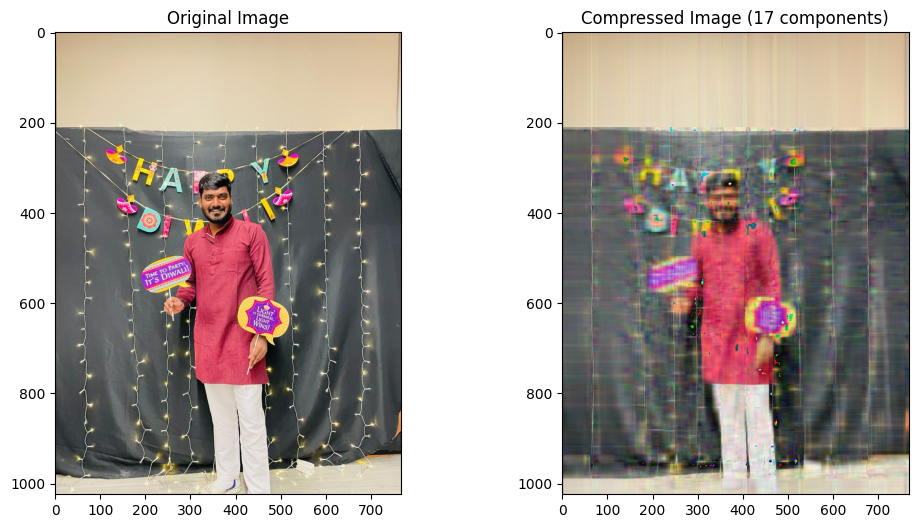

percentage_mem =  0.11627578735351562
relative_error =  0.15031307769425356


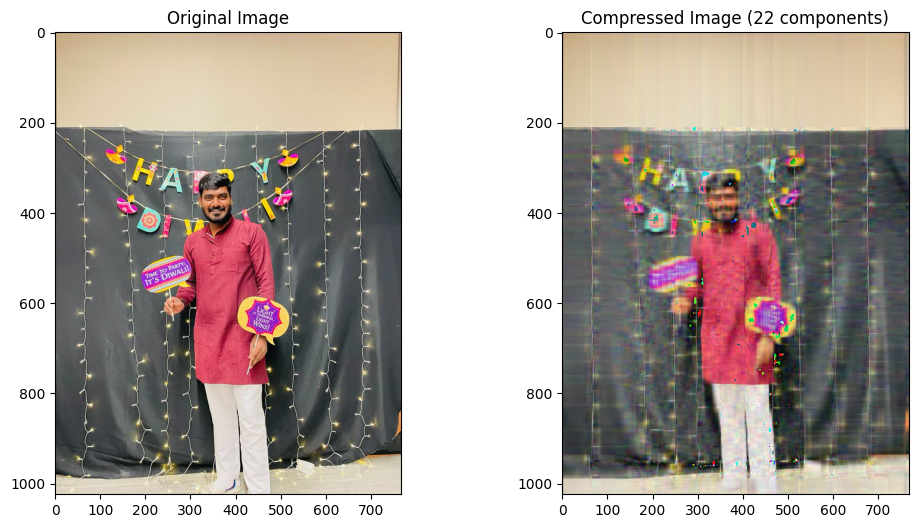

percentage_mem =  0.15047454833984375
relative_error =  0.1396475070728167


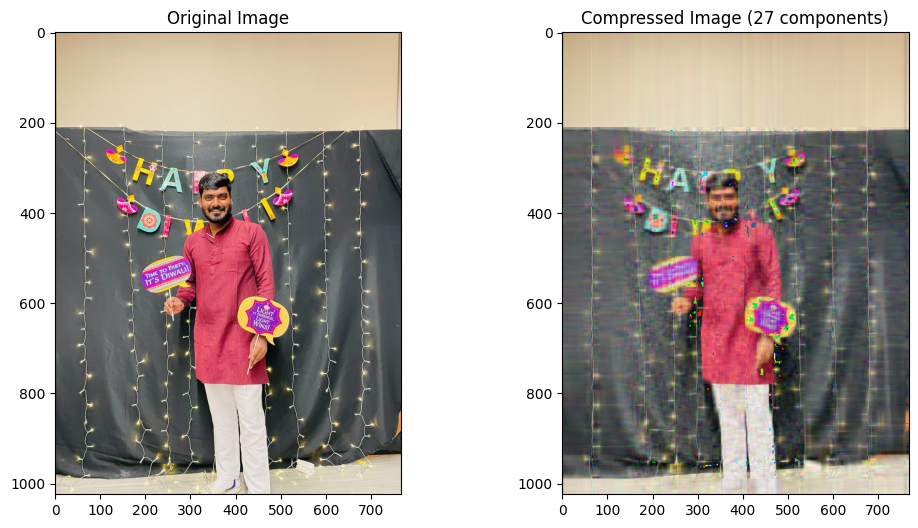

percentage_mem =  0.18467330932617188
relative_error =  0.13081884569710145


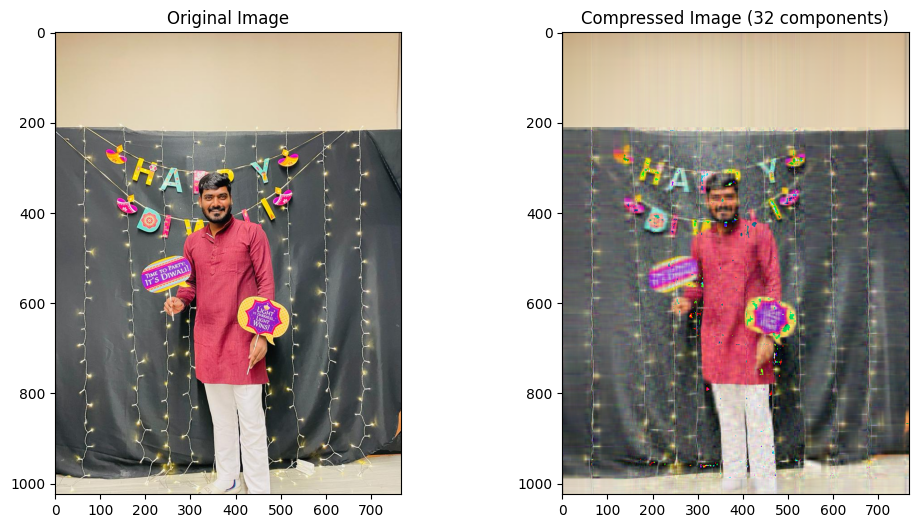

percentage_mem =  0.2188720703125
relative_error =  0.12344380071288594


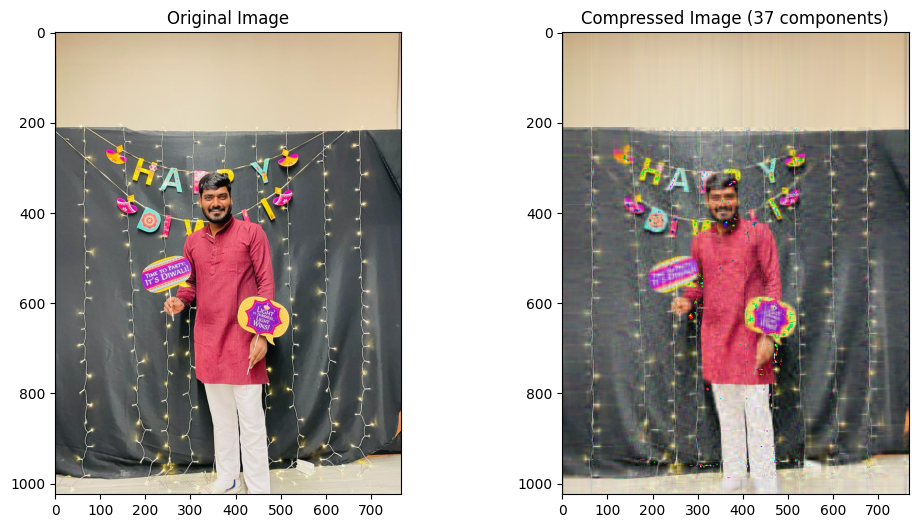

percentage_mem =  0.2530708312988281
relative_error =  0.11712839504205584


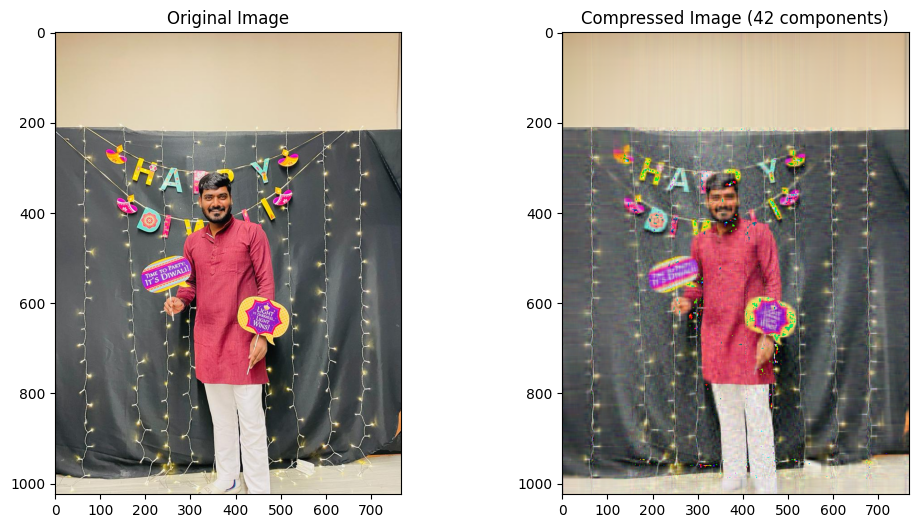

percentage_mem =  0.28726959228515625
relative_error =  0.11157481635740575


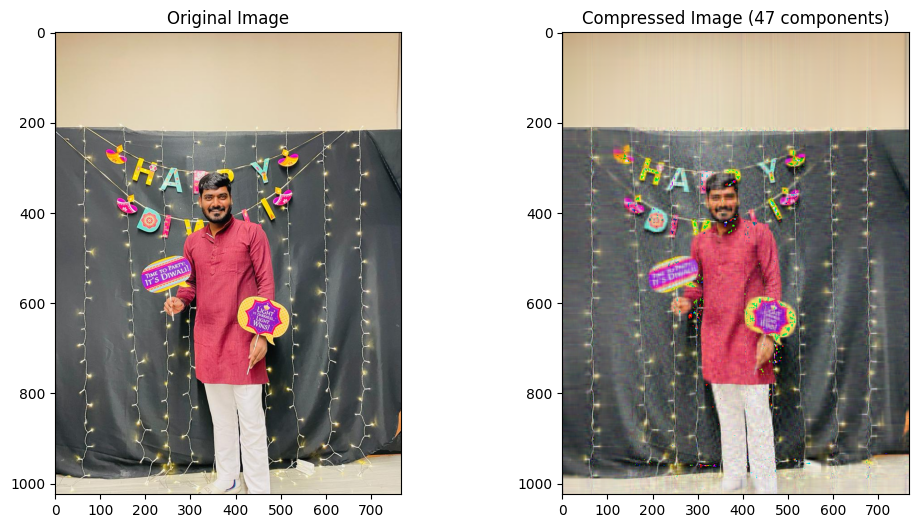

percentage_mem =  0.3214683532714844
relative_error =  0.10656437172369798


In [43]:
# problem 3

for i in range(2,50,5):
    compress_image('//content/WhatsApp Image 2023-11-20 at 11.28.46 PM.jpeg', i)

def compress_image(img_path, num_components):
    # Load color image
    img = Image.open(img_path)
    img_array = np.array(img)


    # Separate color channels (R, G, B)
    red_channel = img_array[:,:,0]
    green_channel = img_array[:,:,1]
    blue_channel = img_array[:,:,2]

    # Perform SVD for each channel
    U_red, sigma_red, V_red = np.linalg.svd(red_channel, full_matrices=False)
    U_green, sigma_green, V_green = np.linalg.svd(green_channel, full_matrices=False)
    U_blue, sigma_blue, V_blue = np.linalg.svd(blue_channel, full_matrices=False)

    # Keep only the specified number of components
    U_red = U_red[:, :num_components]
    sigma_red = np.diag(sigma_red[:num_components])
    V_red = V_red[:num_components, :]

    U_green = U_green[:, :num_components]
    sigma_green = np.diag(sigma_green[:num_components])
    V_green = V_green[:num_components, :]

    U_blue = U_blue[:, :num_components]
    sigma_blue = np.diag(sigma_blue[:num_components])
    V_blue = V_blue[:num_components, :]

    # Reconstruct compressed channels
    compressed_red_channel = U_red @ sigma_red @ V_red
    compressed_green_channel = U_green @ sigma_green @ V_green
    compressed_blue_channel = U_blue @ sigma_blue @ V_blue

    # Stack the compressed channels to get the compressed color image
    compressed_image = np.stack(
        [compressed_red_channel, compressed_green_channel, compressed_blue_channel],
        axis=-1
    )

    # Display the original and compressed images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    # Compressed Image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image.astype(np.uint8))
    plt.title(f'Compressed Image ({num_components} components)')

    plt.show()

    # Get dimensions
    height, width, channels = img_array.shape
    h, w , c = compressed_image.shape

    original_size = height * width
    compressed_size = (h * num_components + w * num_components + num_components ) * 3

    percentage_mem = compressed_size / original_size
    print("percentage_mem = ",+percentage_mem)

    relative_error = np.linalg.norm(img_array - compressed_image)/np.linalg.norm(img_array)

    print("relative_error = ",+relative_error)

